### Approximating non-Gaussian distributions

#### Test Energy Functions from [Variational Inference with Normalizing Flows](https://arxiv.org/pdf/1505.05770v6.pdf)

$$ p(z) \propto \exp^{-U(z)} $$

with `U(z)`'s from Table 1 

In [46]:
%pylab inline
import seaborn as sns
sns.set(rc={'image.cmap': 'jet'})

Populating the interactive namespace from numpy and matplotlib


In [2]:
sigmoid = lambda x_: 1./(1+np.exp(-x_))
w1 = lambda z1: np.sin(2.*np.pi*z1/4.)
w2 = lambda z1: 3.*np.exp(-0.5*((z1-1.)/0.6)**2)
w3 = lambda z1: 3.*sigmoid((z1-1.)/0.3)

In [3]:
p1 = lambda z: np.exp(-0.5*((np.linalg.norm(z, axis=0)-2.)/0.4)**2 +
                      np.log(np.exp(-0.5*((z[0]-2)/0.6)**2)+
                             np.exp(-0.5*((z[0]+2)/0.6)**2)))

p2 = lambda z1, z2: np.exp(-0.5*((z2-w1(z1))/0.4)**2)

p3 = lambda z: (np.exp(-0.5*((z[1]-w1(z[0]))/0.35)**2) +
                np.exp(-0.5*((z[1]-w1(z[0])+w2(z[0]))/0.35)**2))

p4 = lambda z: (np.exp(-0.5*((z[1]-w1(z[0]))/0.4)**2) +
                np.exp(-0.5*((z[1]-w1(z[0])+w3(z[0]))/0.35)**2))

Visualize each density function

In [4]:
x = np.arange(-4., 4., 0.01)
y = np.arange(-4., 4., 0.01)
X, Y = np.meshgrid(x, y)

XY = np.rollaxis(np.dstack([X,Y]), axis=2)

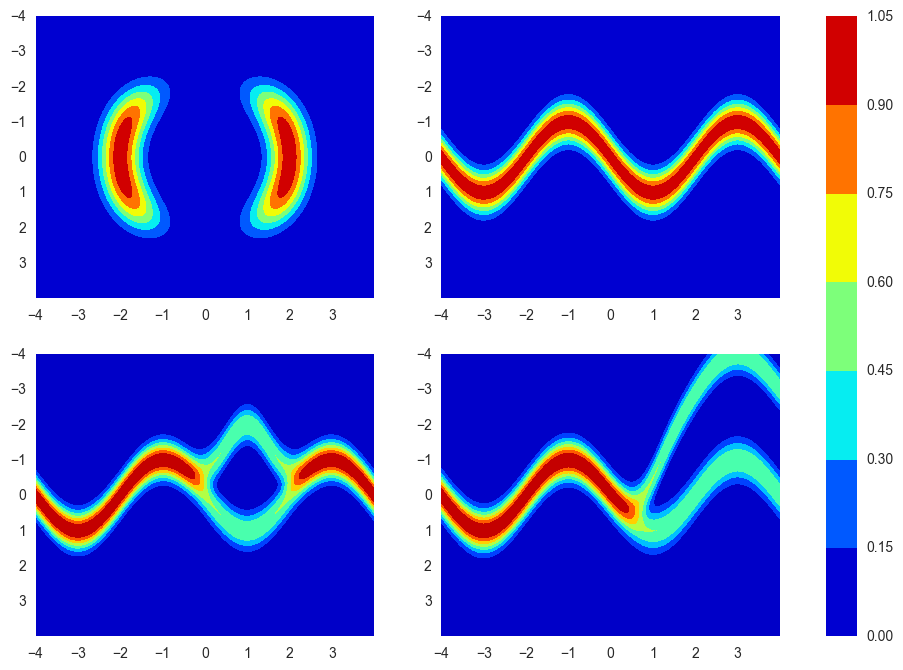

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

Z1 = p1(XY)
Z2 = p2(X, Y)
Z3 = p3(XY)
Z4 = p4(XY)

cf = axs[0,0].contourf(X, Y, Z1)
axs[0,1].contourf(X, Y, Z2)
axs[1,0].contourf(X, Y, Z3)
axs[1,1].contourf(X, Y, Z4)

axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()

fig.colorbar(cf, ax=axs.ravel().tolist());

#### Distribution 4.1 from [A family of non-parametric density estimation algorithms](http://math.nyu.edu/faculty/tabak/publications/Tabak-Turner.pdf)

In [47]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return(theta, rho)

def p(x, y):
    t, r = cart2pol(x,y)
    return np.exp(-0.5*t**2 - 0.5*((r-1.)/0.1)**2)

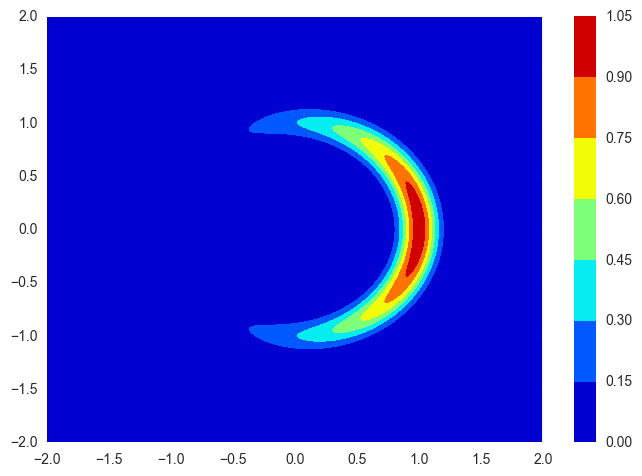

In [48]:
x = np.arange(-2., 2., 0.01)
y = np.arange(-2., 2., 0.01)
X, Y = np.meshgrid(x, y)

Z = p(X, Y)
plt.figure()
plt.contourf(X, Y, Z)
plt.colorbar();
plt.ylim([-2, 2])
plt.xlim([-2, 2]);

Sample from `p` using Rejection Sampling 

[Reference](http://python-for-signal-processing.blogspot.com/2014/02/methods-of-random-sampling-using.html)

In [ ]:
M = 1.1 # scale factor
m = 10000
ux = np.random.uniform(-0.5, 1.3, m)
uy = np.random.uniform(-1.2, 1.3, m)
uz = np.random.uniform(size=m)
idx= where(uz <= p(ux,uy)/M)[0] # rejection criterion
ux_, uy_ = ux[idx], uy[idx]

ax = sns.kdeplot(ux_, uy_)
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(ux_)/len(ux)))
plt.ylim([-2, 2])
plt.xlim([-2, 2]);